# Exercise: Association of two variables.

## Exercise 1

A newspaper asks two of its staff to review the coffee quality at different
trendy cafés. The coffee can be rated on a scale from 1 (miserable) to 10 (excellent).
The results of the two coffee enthusiasts X and Y are as follows:

|$Cafe {i}$|$x_i$|$y_i$|
|----|-----|--|
|1|3|6|
|2|8|7|
|3|7|10|
|4|9|8|
|5|5|4|

* (a) Calculate and interpret Spearman’s rank correlation coefficient.
* (b) Does Spearman’s R differ depending on whether ranks are assigned in a decreasing or increasing order?
* (c) Suppose the coffee can only be rated as either good (>5) or bad (≤5). Do the
chances of a good rating differ between the two journalists?

**Creating the above dataset for calculation**

In [10]:
Cafe_i = c(1:5)
Cafe_X = c(3, 8, 7, 9, 5)
Cafe_y = c(6, 7, 10, 8, 4)

# Now we will bind them

Cafe_data = cbind(Cafe_i, X=Cafe_X, Y =Cafe_y)
Cafe_data

Cafe_i,X,Y
1,3,6
2,8,7
3,7,10
4,9,8
5,5,4


### Calculation and interpretion of Spearman's rank correlation coefficient

In [11]:
# Now to calulate the Spearman's rank correlation coefficient we need to use spearman method on cor() function.
# Note that this is an ordinal data so we can apply the rank correlation 

cor(Cafe_X, Cafe_y, method='spearman')

[1] 0.6

`Interpretation:` From the above result we can say that there is a positive correlation b/w the X and Y variable with a moderate strongness.

* we can say that as X increases Y will also increases. 

### Spearman's rank correlation with different assign order.

In [12]:
Cafe_data = Cafe_data[order(Cafe_data[,'X']),]
Cafe_data

Cafe_i,X,Y
1,3,6
5,5,4
3,7,10
2,8,7
4,9,8


In [13]:
CafeX = Cafe_data[,"X"]
CafeY = Cafe_data[,"Y"]

In [14]:
# Now we will calculate the spearman's rank correlation on the accending ordered data.
result = cor(CafeX, CafeY, method='spearman')
print(paste("Spearman's rank correlation on the accending orderd data =", result))


[1] "Spearman's rank correlation on the accending orderd data = 0.6"


In [15]:
Cafe_data = Cafe_data[order(Cafe_data[,'X'], decreasing=TRUE),]
Cafe_data

Cafe_i,X,Y
4,9,8
2,8,7
3,7,10
5,5,4
1,3,6


In [16]:
CafeX = Cafe_data[,"X"]
CafeY = Cafe_data[,"Y"]

In [17]:
# Now we will calculate the spearman's rank correlation on the decreasing ordered data.
result = cor(CafeX, CafeY, method='spearman')
print(paste("Spearman's rank correlation on the accending orderd data =", result))

[1] "Spearman's rank correlation on the accending orderd data = 0.6"


`Conclusion:` As we can see that there is no difference in all of three calculation hence we can say that Spearman's R is not differ whether ranks are assigned in a decreasing or increasing order.

### if cofee are rated as good ($>5$) or bad ($\leq5$)

Now we need to make some modification on the dataset as asked, we need to put two condition on the dataset.

In [20]:
Cafe_data2 = Cafe_data

In [18]:
# NOw we need to create a contingency table for this 
addmargins(table(c(Cafe_data2[,2],Cafe_data2[,3]), c(rep("X",5),rep("Y",5))))

ERROR: Error in table(c(Cafe_data2[, 2], Cafe_data2[, 3]), c(rep("X", 5), rep("Y", : object 'Cafe_data2' not found


**Question:** Do the chance of a good rating differ b/w thetwo journalists.

`hint:` for this we need to calcuate the odd ratio. which gives us the ratio of chances of having an event or having a no-event.
`Note:` we can only perform the odd ratio only on the 2 x 2 table so we need to extract the necessary data.

In [ ]:
Cafe_data3 = table(c(Cafe_data2[,2],Cafe_data2[,3]), c(rep("X",5),rep("Y",5)))
Cafe_data3

In [68]:
# 
Odd.ratio = function(Dataset){
    
    if (all(dim(Dataset) == c(2,2))){
        
        risk1 = (Dataset[1,1]/sum(Dataset[,1]))/(Dataset[1,2]/sum(Dataset[,2]))
        risk2 = (Dataset[2,1]/sum(Dataset[,1]))/(Dataset[2,2]/sum(Dataset[,2]))
        
		# odd ratio is the ratio of having event to having no-event.
        #print(paste("Relative risk1 = ",risk1))
        #print(paste("Relative risk1 = ",risk2))
        
        OR = risk1/risk2
        OR
    }
    else{print("Dataset should have a 2 x 2 dimension ")}
}

In [ ]:
Cafe_data3

In [ ]:
OR = Odd.ratio(Cafe_data3)
OR

* Above result shows that Bad rating is 2.66 times higher for X journalists compare to Y.
* To calculate the Good rating we will inverse our result.

In [ ]:
1/OR

* above result shows that there is a 0.34 times higher good rating by Y journalists than good rating by X.

___
___

In [ ]:
table(Cafe_data2)

## Exercise 2

A total of 150 customers of a petrol station are asked about their satisfaction with their car and motorbike insurance. The results are summarized below:

|-|Satisfied|Unsatisfied|Total|
|----|-----|--|--|
|Car|33|25|58|
|Car (diesel engine)|29|31|60|
|Motorbike|12|20|32|
|___|___|___|___|
|Total|74|76|150|

* (a) Determine and interpret Pearson’s χ2 statistic, Cramer’s V , and Ccorr.
* (b) Combine the categories “car” and “car (diesel engine)” and produce the corresponding 2 × 2 table. Calculate χ2 as efficiently as possible and give a meaningful interpretation of the odds ratio.
* (c) Compare the results from (a) and (b)

In [7]:
# first we will make  the contingency table

Petrol_data = matrix(c(33,25,29,31, 12,20), ncol=2, byrow=T)

colnames(Petrol_data) = c("Satisfied", "Unsatisfied")
rownames(Petrol_data) = c("Car", "Car (diesel engine)", "Motorbike")

Petrol_data

,Satisfied,Unsatisfied
Car,33,25
Car (diesel engine),29,31
Motorbike,12,20


In [8]:
# contingency table 
addmargins(Petrol_data)

,Satisfied,Unsatisfied,Sum
Car,33,25,58
Car (diesel engine),29,31,60
Motorbike,12,20,32
Sum,74,76,150


### Pearson's $\chi^2$ Statistic

In [9]:
chisq.test(Petrol_data)


	Pearson's Chi-squared test

data:  Petrol_data
X-squared = 3.144, df = 2, p-value = 0.2076


In [10]:
chisq.max.value = function(Dataset){
    
    # now first we need to get the dimension of the dataset.
    n = sum(Dataset)
    maxvalue = n*(min(dim(Dataset))-1)
    maxvalue
}

In [11]:
chisq.max.value(Petrol_data)

[1] 150

`Conclusion:` From this result we can say that there is no clear relationship by the satisfaction and the petorl on the petrol station.

___
### Carmer's V Statistic

In [12]:
# To calculate the Carmer's V Statistic we need to import the vcd data
library(vcd)

Loading required package: grid


In [13]:
assocstats(Petrol_data)

                    X^2 df P(> X^2)
Likelihood Ratio 3.1684  2  0.20512
Pearson          3.1440  2  0.20763

Phi-Coefficient   : NA 
Contingency Coeff.: 0.143 
Cramer's V        : 0.145 

`Conclusion:` From the above result we can say that there is a very weak relationship b/w the satifation to the customers with petrol on a petrol station.

___
### Correlation Coefficient $C_{corr}$

In [14]:
# to get the correlation coefficient we need to assocstats function from vcd library 
# from this we need to get the conttingency value and devide it by Cmax

Cmax =  sqrt(min(dim(Petrol_data)-1)/ min(dim(Petrol_data)))
assocstats(Petrol_data)$cont/Cmax

[1] 0.2026314

`Conclusion:` Our Correlation coefficient comes as : 0.20 which show a weak relationship b/w the Satisfaction and the Petrol Station.

___
___

### Odd Ratio on Car and Car (diesel engine) variables

In [15]:
Petrol_data[1:2,]

,Satisfied,Unsatisfied
Car,33,25
Car (diesel engine),29,31


In [16]:
# performing the chi-square test on the above data.
chisq.test(Petrol_data[1:2,])


	Pearson's Chi-squared test with Yates' continuity correction

data:  Petrol_data[1:2, ]
X-squared = 0.55785, df = 1, p-value = 0.4551


In [17]:
chisq.max.value(Petrol_data[1:2,])

[1] 118

Now as asked in the questions we will calculate the odd ratio. for that we will use a custom function which is written bellow. 

In [98]:
Odd.ratio = function(Dataset){
    
    if (all(dim(Dataset) == c(2,2))){ 
		# odd ratio is the ratio of having event to having no-event.
        OR = (Dataset[1,1]*Dataset[2,2]) / (Dataset[1,2] * Dataset[2,1])
        OR
    }
    else{print("Dataset should have a 2 x 2 dimension ")}
}

In [99]:
Odd.ratio(Petrol_data[1:2,])

[1] 1.411034

* The above interpretation show that the chance of Satisfaction for a car customers is 1.41 times higher than the Unsatisfaction for a car custmer.

### Comparing the result of above section

Later

___
___

## Exercise 3

There has been a big debate about the usefulness of speed limits on
public roads. Consider the following table which lists the speed limits for country
roads (in miles/h) and traffic deaths (per 100 million km) for different countries in
1986 when the debate was particularly serious:

* (a) Draw the scatter plot for the two variables.
* (b) Calculate the Bravais–Pearson and Spearman correlation coefficients. 
* (c) What are the effects on the correlation coefficients if the speed limit is given in
km/h rather than miles/h (1 mile/h ≈ 1.61 km/h)?
* (d) Consider one more observation: the speed limit for England was 70miles/h and
the death rate was 3.1.
    * (i) Add this observation to the scatter plot.
    * (ii) Calculate the Bravais–Pearson correlation coefficient given this additional
observation.

|Country|Speed Limit| Traffic deaths|
|-------|-----------|---------------|
|Denmark|55|4.1|
|Japan|55|4.7|
|Canada|60|4.3|
|Netherlands|60|5.1|
|Italy|75|6.1|

In [21]:
# first we will make a the data with contingency with cbind metod.

Country = c("Denmark","Japan","Canda","Netherlands","Italy")
Speed_limi = c(55, 55, 60, 60, 75)
Traffic_deaths = c(4.1, 4.7, 4.3, 5.1, 6.1)

In [28]:
Trafficdata = cbind(Country, Speed_limi, Traffic_deaths)
Trafficdata

Country,Speed_limi,Traffic_deaths
Denmark,55,4.1
Japan,55,4.7
Canda,60,4.3
Netherlands,60,5.1
Italy,75,6.1


### Scatter plot b/w Speed limit and Traffic Deaths

first we will plot the scatter plot b/w the speed limits and traffic deaths and we will see the realtionship and their direction.

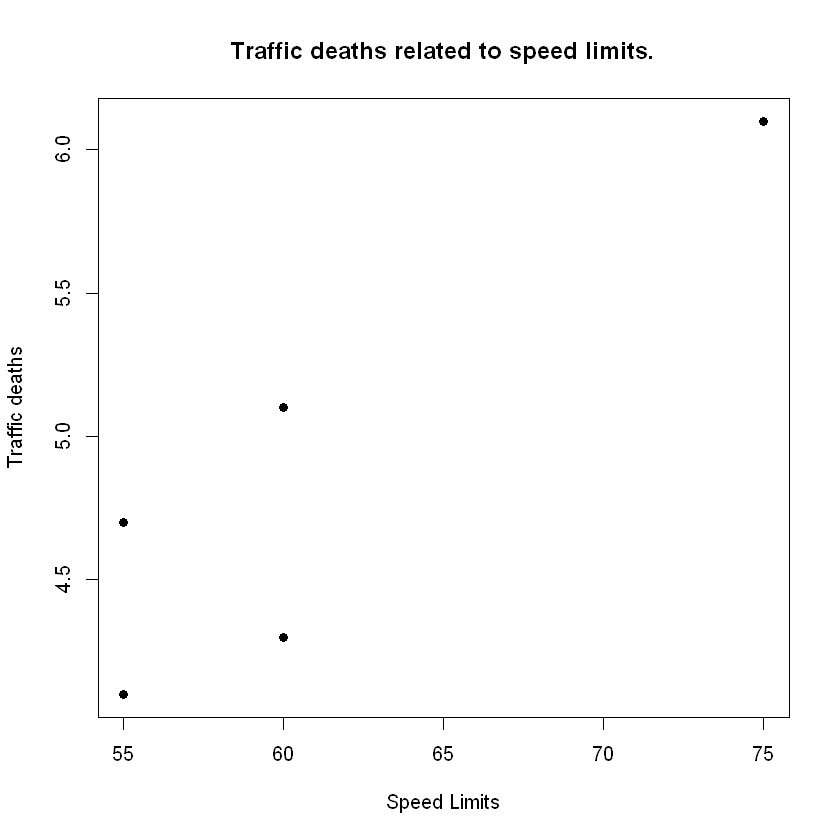

In [23]:
plot(x = Speed_limi,, y=Traffic_deaths, xlab="Speed Limits", ylab="Traffic deaths", pch=16, main="Traffic deaths related to speed limits.")

**`Conlusion 1:`** From the above result we can say that there is a positive correlation b/w the speed limits and traffic deaths this shows that as we increases the speed limits there is a high chance of high number of deaths.

___

### Bravais-Pearson and Spearman correlation coefficients 

Now we will check the correlation b/w the speed limit and the traffic deaths which will define that how much traffic deaths are stronglly related to the speed limit. 

In [24]:
# To calculate the Bravais-Pearson and Spearman Correlation coefficients 
# we need to use cor() function and need to use pearson and spearman method on method argument in the cor() function.

pearson_cor = cor(Speed_limi, Traffic_deaths, method='pearson')
spearman_cor = cor(Speed_limi, Traffic_deaths, method='spearman')


print(paste("Pearson correlation Coefficient: ", pearson_cor))
print(paste("Spearson Correlation Coefficient: ", spearman_cor))

[1] "Pearson correlation Coefficient:  0.890832976662577"
[1] "Spearson Correlation Coefficient:  0.737864787372622"


**`Conclusion 2:`** Both the correlation coefficient shows that there is a strong relationship b/w the Speed limits and traffic deaths.

___

### Note: 
**There will be no change in the correlation coefficient, if we changes the units of the speed limits.** 

### Bravais-Pearson and Spearman correlation coefficients with new data.

if we add one more observation to over dataset like England was 70 miles/h and the death rate was 3.1, if we add this what will happan in the result.

#### addition into the dataset.

In [32]:
Trafficdata = rbind(Trafficdata, c("England", 70, 3.1))

In [33]:
Trafficdata

Country,Speed_limi,Traffic_deaths
Denmark,55,4.1
Japan,55,4.7
Canda,60,4.3
Netherlands,60,5.1
Italy,75,6.1
England,70,3.1


#### Plotting Scatter Plot

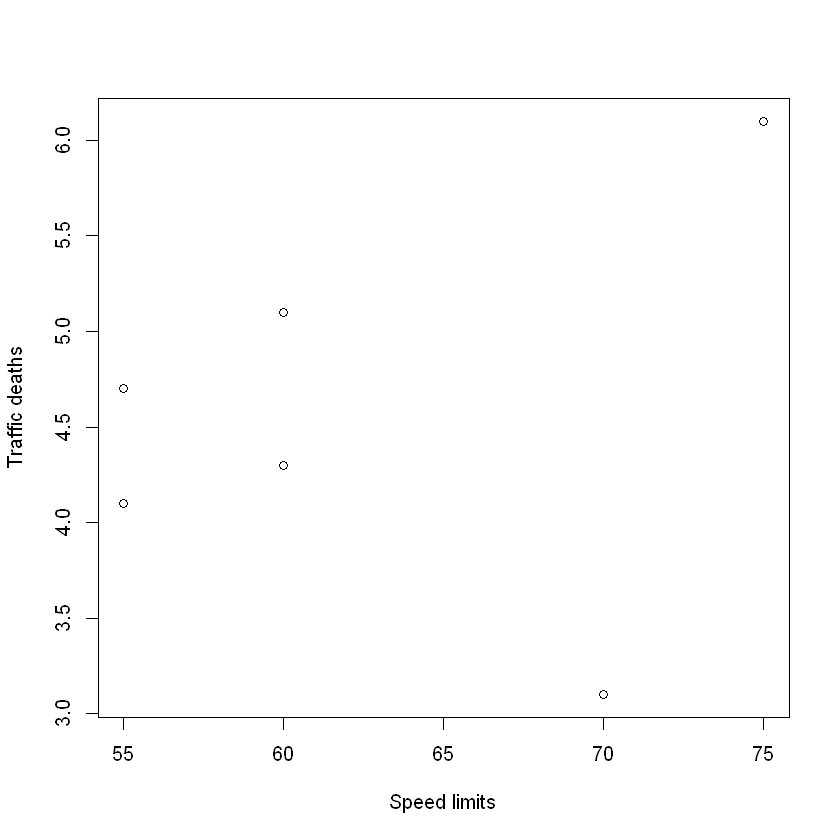

In [36]:
plot(x= Trafficdata[,"Speed_limi"],y= Trafficdata[,"Traffic_deaths"] , xlab='Speed limits', ylab='Traffic deaths')

#### Correlation Coefficient:

In [40]:
Speed_limi = append(Speed_limi, 70)
Traffic_deaths =  append(Traffic_deaths, 3.1)

pearson_cor = cor(Speed_limi, Traffic_deaths, method='pearson')
spearman_cor = cor(Speed_limi, Traffic_deaths, method='spearman')


print(paste("Pearson correlation Coefficient: ", pearson_cor))
print(paste("Spearson Correlation Coefficient: ", spearman_cor))

[1] "Pearson correlation Coefficient:  0.241191535097474"
[1] "Spearson Correlation Coefficient:  0.264820448851425"


`Conclusion:` From one single data entry we can see that there is a drop of .50 in value which shows a weak realtionship b/w the Speed limits and the Traffic deaths.

Note: This new entry can be outlier which need to be filter during the analysis, outliers can make our analysis difficult and may lead us to wrong assumption, so we need to take care of the outlier.

To find out the outlier we can use the box-plot.

____
____

## Exercies 4:

The famous passenger liner Titanic hit an iceberg in 1912 and sank. A
total of 337 passengers travelled in first class, 285 in second class, and 721in third
class. In addition, there were 885 staff members on board. Not all passengers could
be rescued. Only the following were rescued: 135 from the first class, 160 from the
second class, 541 from the third class and 674 staff.

1. Determine and interpret the contingency table for the variables “travel class”
and “rescue status”.
2. Use a contingency table to summarize the conditional relative frequency distributions of rescue status given travel class. Could there be an association of the
two variables?
3. What would the contingency table from (a) look like under the independence
assumption? Calculate Cramer’s V statistic. Is there any association between
travel class and rescue status?
4. Combine the categories “first class” and “second class” as well as “third class”
and “staff”. Create a contingency table based on these new categories. Determine
and interpret Cramer’s V , the odds ratio, and relative risks of your choice.
5. Given the results from (1) to (4), what are your conclusions?

### Creating dataset

In [29]:
Titanic = matrix(c(135, 202, 160, 125, 541, 180, 674, 207), ncol=2, byrow=T)
colnames(Titanic) = c("Rescued", "NotRescued")
rownames(Titanic) = c("First Class", "Second Class", "Third Class","Staff")

In [30]:
Titanic

,Rescued,NotRescued
First Class,135,202
Second Class,160,125
Third Class,541,180
Staff,674,207


### Contingency table and its interpretation

In [54]:
addmargins(Titanic)

,Rescued,NotRescued,Sum
First Class,135,202,337
Second Class,160,125,285
Third Class,541,180,721
Staff,674,207,881
Sum,1510,714,2224


From the above output we can say that there are 2224 people on the titanic during the collison with iceberg, and from them there were only 1510 people were saved from all of them.

**Note:** Both the variables, Travel class (X), and Rescue Status (Y) are Categorical variable so we cant perform Pearson and Spearman's Correlation coefficient to measure the association of b/w them. 
 * For Categorical variable we need to perfomr the Chi-Square test and Carmer's V test to measure the association of two variables. 

In [39]:
First_class = cbind(class= c(rep(1, 337)), status = c(rep(1, 135), rep(0, 202)))
Second_class = cbind(class = c(rep(2, 285,)), status = c(rep(1, 160), rep(0, 125)))
Third_class = cbind(class = c(rep(3, 721,)), status = c(rep(1, 541), rep(0, 180)))
Staff = cbind(class = c(rep(4, 881,)), status = c(rep(1, 674), rep(0, 207)))

In [41]:
Titanic2 = rbind(First_class, Second_class, Third_class, Staff)

Titanic_class = Titanic2[, 'class']
Titanic_status = Titanic2[,'status']

In [106]:
table(Titanic2[,1], Titanic2[,2])

   
      0   1
  1 202 135
  2 125 160
  3 180 541
  4 207 674

### Conditional relative frequency

In [55]:
addmargins(prop.table(Titanic))

,Rescued,NotRescued,Sum
First Class,0.06070144,0.09082734,0.1515288
Second Class,0.07194245,0.05620504,0.1281475
Third Class,0.24325540,0.08093525,0.3241906
Staff,0.30305755,0.09307554,0.3961331
Sum,0.67895683,0.32104317,1.0000000


From the proportion table we can say that 68 percent people were saved, there were 30% from staff, 24% from third class, 7% from second class, 6% from  first class.  

### Association of travel class and rescue status.

Now we we will check the relation b/w the rescue status and the travel class, to check this we will use the correlation coefficient method of pearson and spearman both.

In [73]:
Titanicdata = data.frame(Titanic)

In [75]:
Titanicdata["Class_level"] = c(1,2,3,4)

In [76]:
Titanicdata

,Rescued,NotRescued,Class_level
First Class,135,202,1
Second Class,160,125,2
Third Class,541,180,3
Staff,674,207,4


**Association b/w two variables:** There might be a relation b/w the two variables but we can say about the direction and strongness of the relation b/w the vairables, for that we need to perform the chi-square test or Carmer's V test.

### Assumpation of independency

if these two variables are independent then our Contingency table would be look like this.

In [109]:
titanic_independent = matrix(c(168.5, 168.5, 142.5, 142.5, 360.5, 360.5, 440.5, 440.5), ncol=2, byrow=T)
dimnames(titanic_independent) = list(Travel_class = c("First Class", "Second Class", "Third Class", "Staff"), 
                                    Rescue_Status = c("Rescued", "Not Rescued"))
addmargins(titanic_independent)

,Rescued,Not Rescued,Sum
First Class,168.5,168.5,337
Second Class,142.5,142.5,285
Third Class,360.5,360.5,721
Staff,440.5,440.5,881
Sum,1112.0,1112.0,2224


If our two variables were independent then our Contingency table would look like this, but our table is not like this then we can say that our variable are somehow related to each other, but yet we can't say about strongness and direction of the association b/w the travel class and Rescue status.  

In [112]:
chisq.test(titanic_independent)


	Pearson's Chi-squared test

data:  titanic_independent
X-squared = 0, df = 3, p-value = 1


### Pearson $\chi^2$ test

Now we will perform a chi-square test to check the relation b/w the two categorical varibable.

In [111]:
Titanic

,Rescued,NotRescued
First Class,135,202
Second Class,160,125
Third Class,541,180
Staff,674,207


In [113]:
# performing the chi-square test
chitest = chisq.test(Titanic, correct = F)

In [114]:
chitest


	Pearson's Chi-squared test

data:  Titanic
X-squared = 184.67, df = 3, p-value < 2.2e-16


From the above test we can say that our p-value of chi-square test si very very close to zero, So we can say that both the varibale are independent to each other but before making this statement we will also perform Carmer's V test to see this.

### Carmer's V test

In [123]:
V =  (chitest$statistic/ sum(Titanic))

In [124]:
V

X-squared 
0.08303689

above values is very close to zero which shows that there is no relation b/w these two variable proportions, or in other words we can say that both the variables are independent to each other.

`Conclusion:`  Form the above both tests we can say taht there is no realtion b/w the travel class and the rescue status.

### New 2 x 2 contingency table

**Combining the categories "first class" and "second class" as well as "third class" and "staff".**

In [125]:
# combining the 

In [31]:
Titanic

,Rescued,NotRescued
First Class,135,202
Second Class,160,125
Third Class,541,180
Staff,674,207


In [32]:
Titanic3 = matrix(c(195, 327, 1215, 387), ncol=2, byrow=T)
dimnames(Titanic3) = list(Classes = c("First and Second Class", "Third Class and Staff"), Status = c("Rescued", "Not rescued"))

Titanic3

,Rescued,Not rescued
First and Second Class,195,327
Third Class and Staff,1215,387


#### chi-Square test

In [37]:
chitest2 = chisq.test(Titanic3, correct = F)
chitest2


	Pearson's Chi-squared test

data:  Titanic3
X-squared = 261.33, df = 1, p-value < 2.2e-16


#### Carmer's V test

In [36]:
V2 = chitest2$statistic/ chisq.max.value(Titanic)
V2

X-squared 
0.1175031

`Conclusion:` From above test we can say that after combining the travel classes, these two variables travel class and Rescue status are independent to each other or they are very very weakly related to each other..

Now we will see the relative risk and odd ratio.

Note: we can perform the above carmer test by using the `assocstats()` fucntion from the `vcd` libarary.  We will use the 'Titanic_class' and 'Titaninc_status' R variables which is assigned on above cells. we will use these two variable on assocstats() function.

In [44]:
library(vcd)

`xtabs:` From this library we will use the xtabs() function to create a table fromat of the data with joint absolute frequency. if we dont want to use the xtabs we can use contingency table directly if we have that.

Now since we already have a contingency table of the titanic dataset so now we will use that table to obtain the association.

In [51]:
Titanic

,Rescued,NotRescued
First Class,135,202
Second Class,160,125
Third Class,541,180
Staff,674,207


In [52]:
# Perfoming the carmer's V test by using the assocstats from the vcd libraray.
assocstats(Titanic)

                    X^2 df P(> X^2)
Likelihood Ratio 176.26  3        0
Pearson          184.67  3        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.277 
Cramer's V        : 0.288 

From the above test we can see that in this result we have somthing different result than the above result. in this we have 184.67 as the pearson's chi-squre value and in this the probability of having greater than this value is 0.

* both the contingency coefficient and the Cramer's V values both shows that both the variables have a very weak positive association b/w the "Rescue status" and "Travel Class"

* So from the above result we can't say that the rescue operation is performed according to their rank of travel class.

#### relative risk b/w Rescue status and Travel Class

In [67]:
Relative.risk = function(Dataset){
    
    if (all(dim(Dataset) == c(2,2))){
        
        risk1 = (Dataset[1,1]/sum(Dataset[,1]))/(Dataset[1,2]/sum(Dataset[,2]))
        risk2 = (Dataset[2,1]/sum(Dataset[,1]))/(Dataset[2,2]/sum(Dataset[,2]))
        
        #print(paste("Relative risk1 = ",risk1))
        #print(paste("Relative risk1 = ",risk2))
        
        list(risk1= risk1, risk2=risk2)
    }
    else{print("Dataset should have a 2 x 2 dimension ")}
}

In [141]:
Titanic3

,Rescued,Not rescued
First and Second Class,195,327
Third Class and Staff,1215,387


In [140]:
Relative.risk(Titanic3)

$risk1
[1] 0.3019715

$risk2
[1] 1.589807

`risk1:` risk1 defines that: the proportion of  First and second Class members are .30 times less Rescued Compare to Third and Satff memebers which are not rescued.

`risk2:` risk2 defines that: The proportion of the Third and Staff members are 1.65 times greater Rescued Compare to which are not rescued in First and Second Class.

#### odd ratio

In [143]:
Odd.ratio(Titanic3)

[1] 0.1899422

The is a 0.18 times less chances to rescue from the first and second class compare to not rescuing from third class and staff members.

____
____

## Exercise 5

To study the association of the monthly average temperature (in $^◦C,
X$) and hotel occupation (in %, Y), we consider data from three cities: Polenca
(Mallorca, Spain) as a summer holiday destination, Davos (Switzerland) as a winter
skiing destination, and Basel (Switzerland) as a business destination.

* (a) Calculate the Bravais–Pearson correlation coefficient. The following summary
statistics are available:$\Sigma_{i=1}^{36}x_iy_i = 22776, \bar x = 12.22, \bar y = 51.28,  \bar s_x^2 = 76.95,
\text {and   } \bar s_y^2 = 706.98$
* (b) Interpret the scatter plot in Fig.4.7 which visualizes temperature and hotel occupancy for Davos (D), Polenca (P), and Basel (B).
* (c) Use R to calculate the correlation coefficient separately for each city. Interpret
the results and discuss the use of the correlation coefficient if more than two
variables are available.

|Months||Davos||Polenca ||Basel|
|---|---|---|---|---|---|---|
||X |Y |X | Y |X | Y|
|Jan |−6| 91| 10| 13| 1| 23|
|Feb| −5| 89 |10| 21| 0| 82|
|Mar |2 |76 |14 |42 |5 |40|
|Apr |4| 52| 17| 64| 9| 45|
|May |7 |42 |22 |79 |14 |39|
|Jun| 15| 36| 24| 81| 20| 43|
|Jul |17 |37 |26 |86 |23 |50|
|Aug| 19| 39| 27| 92| 24| 95|
|Sep |13 |26 |22 |36 |21 |64|
|Oct| 9| 27| 19| 23| 14| 78|
|Nov |4 |68 |14 |13 |9 |9|
|Dec |0| 92| 12| 41| 4| 12|

In [1]:
# first creating the matrix of numaric values.

MATemp = matrix(c(−6, 91, 10, 13, 1, 23,
        −5, 89, 10, 21, 0, 82,
        2, 76, 14, 42, 5, 40,
        4, 52, 17, 64, 9, 45,
        7, 42, 22, 79, 14, 39,
         15, 36, 24, 81, 20, 43,
         17, 37, 26, 86, 23, 50,
         19, 39, 27, 92, 24, 95,
         13, 26, 22, 36, 21, 64,
         9, 27, 19, 23, 14, 78,
         4, 68, 14, 13, 9, 9,
         0, 92, 12, 41, 4, 12), ncol=6, byrow=T)
 
# adding the column of months.
months = c("Jan", 'Feb', 'Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

# Now we will add the name of the columns.
MATemp = data.frame(months, MATemp)
colnames(MATemp) = c("Months","Davos.X","Davos.Y", "Polenca.X","Polenca.Y" ,"Basel.X","Basel.Y")
MATemp

Months,Davos.X,Davos.Y,Polenca.X,Polenca.Y,Basel.X,Basel.Y
Jan,-6,91,10,13,1,23
Feb,-5,89,10,21,0,82
Mar,2,76,14,42,5,40
Apr,4,52,17,64,9,45
May,7,42,22,79,14,39
Jun,15,36,24,81,20,43
Jul,17,37,26,86,23,50
Aug,19,39,27,92,24,95
Sep,13,26,22,36,21,64
Oct,9,27,19,23,14,78


Now we will calculate all of the above calculation on the data points. but first we need to merge all the X and Y values.

### Scatter plot

Now we will plot a scatter plot to to visualizes temperature and hotel occupancy for Davos, Polenca and Basel.

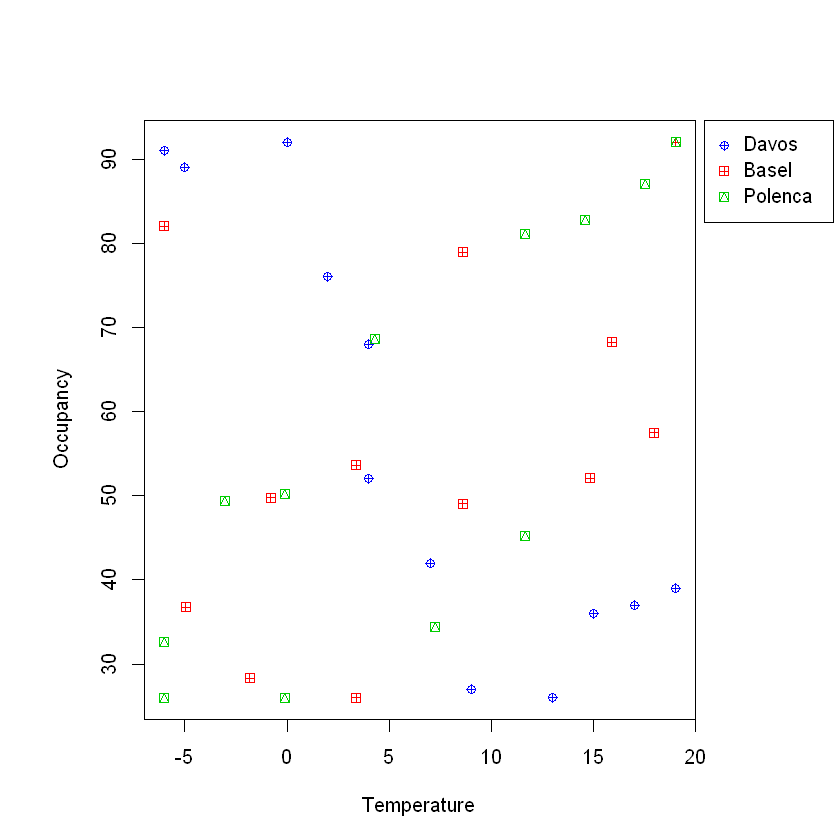

In [2]:
par(mar = c(5,6,5,6))
plot(MATemp$Davos.X, MATemp$Davos.Y, pch=10, xlab='Temperature', ylab='Occupancy', col=4)
par(new=T)
plot(MATemp$Basel.X, MATemp$Basel.Y, pch=12 , axes=F, xlab='', ylab='',col=2)
par(new=T)
plot(MATemp$Polenca.X, MATemp$Polenca.Y, pch=14, axes=F,  xlab='', ylab='', col=3)

legend(x='topright', pch = c(10, 12, 14), col=c(4,2,3), legend=c("Davos", "Basel", "Polenca"),
      xpd=TRUE,inset = c(-0.25, 0.0))

# Note here xpd=TRUE is to put the legend outside the box
# to set the legends outside the figure first we need to set the margin on the plot by using the  mar parameter in par() function 

*  `Davos :` There is a significant change in the occpancy in Davos hotel, from  this observation we can say that Davos hotel is more suitable for winter season or we can say that, this hotel has more occupancy in winter season than summer season or spring season.

* `Basel :` In this hotel also we can say that occupancy increasing as the temperature, so we can say that occupancy is proportional to the temperature for this hotel. In other words this hotel seems to be more suitable for summer seasons.

* `Polenca :` In this hotel also we can say that occupancy increasing as the temperature, so we can say that here also occupancy is proportional to the temperature for this hotel. In other words this hotel seems to be more suitable for summer seasons.

### Correlation Coefficient for Davos hotel

In [3]:
pearson_cor = cor(MATemp$Davos.X, MATemp$Davos.Y, method='pearson')
spearman_cor = cor(MATemp$Davos.X, MATemp$Davos.Y, method='spearman')


print(paste("Davos hotel Pearson correlation Coefficient: ", pearson_cor))
print(paste("Davos hotel Spearson Correlation Coefficient: ", spearman_cor))

[1] "Davos hotel Pearson correlation Coefficient:  -0.870419740889853"
[1] "Davos hotel Spearson Correlation Coefficient:  -0.844134394347707"


`Conclusion:` From above result we can clearly say that there is a negative correlation b/w the Davos hotel occupancy and temperature, and we can say that there is more occupancy in low temperature or in other words, in winter season there is more occupancy compare to the summer or spring season.

### Correlation Coefficient for Basel hotel

In [7]:
pearson_cor = cor(MATemp$Basel.X, MATemp$Basel.Y, method='pearson')
spearman_cor = cor(MATemp$Basel.X, MATemp$Basel.Y, method='spearman')


print(paste("Basel hotel Pearson correlation Coefficient: ", pearson_cor))
print(paste("Basel hotel Spearson Correlation Coefficient: ", spearman_cor))

[1] "Basel hotel Pearson correlation Coefficient:  0.415172754434581"
[1] "Basel hotel Spearson Correlation Coefficient:  0.428072810551727"


`Conclusion:` Above result shows that there is a moderate correlation b/w the Basel hotel and temperature, it means that there is moderate level of  increament in the occupancy in the hotel during summer season. 

### Correlation Coefficient for Polenca hotel

In [8]:
pearson_cor = cor(MATemp$Polenca.X, MATemp$Polenca.Y, method='pearson')
spearman_cor = cor(MATemp$Polenca.X, MATemp$Polenca.Y, method='spearman')


print(paste("Polenca hotel Pearson correlation Coefficient: ", pearson_cor))
print(paste("Polenca hotel Spearson Correlation Coefficient: ", spearman_cor))

[1] "Polenca hotel Pearson correlation Coefficient:  0.818308870004014"
[1] "Polenca hotel Spearson Correlation Coefficient:  0.816906472605911"


`Conclusion:` Above result shows that there is a positive strong correlation b/w the Polenca hotel and the temperature, it shows that in this hotel there is a strong increment of occupancy in the hotel during the summer (or in high temperature) season.

### Correlation Coefficient on more than two variables.

Note: if there are more than two variable are available in the dataset then we can find out the multiple correlation coefficient by using the bellow funciton.

<img src="https://www.real-statistics.com/wp-content/uploads/2012/12/multiple-correlation-coefficient.png" alt="Girl in a jacket" width="200" height="400">

where $r_{xz}, r_{yz}, r_{xy}$ correlation coefficient b/w x and z, y and z, x and y respectively . Here x and y are viewed as the independent variables and z is the dependent variable.

We also define the multiple coefficient of determination to be the square of the multiple correlation coefficient.

Often the subscripts are dropped and the multiple correlation coefficient and multiple coefficient of determination are written simply as $R$ and $R^2$ respectively. These definitions may also be expanded to more than two independent variables. With just one independent variable the multiple correlation coefficient is simply $r$.

Unfortunately, $R$ is not an unbiased estimate of the population multiple correlation coefficient, which is evident for small samples. A relatively unbiased version of $R$ is given by $R$ **adjusted**.

____
____

## Exercise 6



Consider a neighbourhood survey on the use of a local park. Respondents were asked whether the park may be used for summer music concerts and
whether dog owners should put their dogs on a lead. The results are summarized in
the following contingency table:

||Put dogs on a lead|||||
|----|-----|-----|------|---|----|
|||Agree| No opinion| Disagree |Total|
|**Use for concerts**| Agree| 82| 4| 0| 86|
||No opinion| 8 |43| 9| 60|
||Disagree |0| 2| 10| 12|
||Total| 90| 49| 19| 158|

* (a) Calculate and interpret Goodman and Kruskal’s γ.
* (b) Now ignore the ordinal structure of the data and calculate Cramer’s V .
* (c) Create the contingency table which is obtained when the categories “no opinion”
and “agree” are combined.
* (d) What is the relative risk of disagreement with summer concerts depending on
the opinion about using leads?
* (e) Calculate the odds ratio and offer two interpretations of it.
* (f) Determine γ for the table calculated in (c).
* (g) What is your final interpretation and what may be the best measure to use in this
example?

___

Note: Now From the above observation we can interprate this problem in two way:

1. First way is that we make this as the ordinal occurding to highest to lowest grade, in this we will use the rank correlation mehtod to see the association b/w the two variable.
2. Second way is that we perfrom chi-Square and Carmer's V test on this to see the association.


In this section we will see the concordant and discordant pairs which are based on the rank correlation of equal or non-equal underlying scaled values of X and Y variables.

In [2]:
# Creating the table of dataset

Dog_Data = matrix(c( 82, 4, 0, 
 8, 43, 9, 
 0, 2, 10 ), ncol=3, byrow=T)

dimnames(Dog_Data) = list(Dogs_on_lead=c("Agree", "No Opinion", "Disagree"), Use_for_concert=c("Agree", "No Opinion", "Disagree"))



In [3]:
Dog_Data

,Agree,No Opinion,Disagree
Agree,82,4,0
No Opinion,8,43,9
Disagree,0,2,10


In [4]:
# making a contingency table
addmargins(Dog_Data)

,Agree,No Opinion,Disagree,Sum
Agree,82,4,0,86
No Opinion,8,43,9,60
Disagree,0,2,10,12
Sum,90,49,19,158


### Goddman and Kruskal's test

if we have concordant and discordant pair in our problem then we can use these pairs to find out the relation b/w the two variables, here we have concordant and discordant pairs of Dogs on lead and use for concerts two different variables.

Note: This test will be performed by using the `org.gamma()` function from `ryouready` library.

In [7]:
library(ryouready)

Warning message:
"package 'ryouready' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [9]:
ord.gamma(Dog_Data)

Goodman-Kruskal Gamma: 0.983 

`Conclusion:` Form this result we can say that there is a positive very strong  relation b/w the 'Dogs on lead' and the 'use for concerts'.  

In [10]:
ord.tau(Dog_Data)

Kendall's (and Stuart's) Tau statistics
	Tau-b: 0.831
	Tau-c: 0.697

`Tau-b:` Tau-b statistic tests the strength of association of the cross tabulations, both variables have to be ordinal, tau-b make some adjustment for ties. the range of the tau-b vaues is from -1 to 1.

`Tau-c:` Tau-c (also called Stuart-Kendall Tau-c) is more suitable than Tau-b fro the analysis of data based on non-square. So use Tau-b if the underlying scale of both variables has the same number of possible values. and Tau-c if they differ.
    
**For example:** One variable might be scored on a 5-point scale (veru good, good, average, bad, very bad), whereas the other might be based on a finer 10-point scale.

`Conclusion:` From this result also we can say that there is a positive moderate to strong relation b/w the 'Dogs on lead' adn 'use for concerts'.

`Conclusion Final:`  From both of above result we know that in our dataset there are concordant pairs are available that why we have a positive strong association b/w the variable.

In other words we can say that most of the people are agree to use the park for concert and they want to put the dogs on lead.

### Chi-Square and Carmer's V test

Now we will see that another association test by ingoring all the oridinal variable and we will use only the nominal variable.

In [5]:
Dog_Data

,Agree,No Opinion,Disagree
Agree,82,4,0
No Opinion,8,43,9
Disagree,0,2,10


In [20]:
dog_chitest = chisq.test(Dog_Data)
dog_chitest

Warning message in chisq.test(Dog_Data):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  Dog_Data
X-squared = 162.7, df = 4, p-value < 2.2e-16


Note: Now we can see the warning which shows that this result may be incorrect. but we will interprate this result, 

* From the p-value which is very very close to the zero, it looks like that both the variable "Dog on the lead" and "Use for concert" are independent to each other.

* value $\chi^2$ shows the strongness of the association but the range of the association can be tested by using the carmer's V test.

**Cramer's V test**

To perform the Cramer's V test we will use assocstats() function from the vcd library.

In [53]:
library(vcd)

In [54]:
# Performing the association test on the voting dataset on "dogs on lead" and "use for concert"
assocstats(Dog_Data)

                    X^2 df P(> X^2)
Likelihood Ratio 158.32  4        0
Pearson          162.70  4        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.712 
Cramer's V        : 0.718 

From The above test we have found that pearson chi-square test value  is 162.7 which is equal to the previous test, it means taht above test was correct.

* From both the Contingency coefficient and Cramer's V value we can say that there is a strong positive association b/w the "Dogs on lead" and "use for concert" (X and Y ) variables.

* In other words we can say that 71%  people are agreed to use the park for concert and put dogs on lead.

### Merging 'Agree' and 'No Opinion' rows and column 

By combining the Agree and No opinion value we will have a 2x2 contingency table.

In [66]:
DogData.x= cbind(rowSums(Dog_Data[,1:2]), Dog_Data[,3])
DogData.x = rbind(colSums(DogData.x[1:2,]), DogData.x[3,])

# Now we need to give name of new column and rows.

dimnames(DogData.x) = list(Dogs = c("Agree and No Opinion", "Disagree"), Concerts = c("Agree and No Opinion", "Disagree"))
DogData.x

,Agree and No Opinion,Disagree
Agree and No Opinion,137,9
Disagree,2,10


In [91]:
# Relative risk

Relative.risk = function(Dataset, For='X', nrow=1, ncol=FALSE, inverse = FALSE ){
    
    # for: X or Y is used to select the row or column calculate the relative risk by using a row or column. 
    # use: X or Y is used to select the row or column which will be used to find out the relative risk by using both the values. 
    # ncol: ncol is used to select the column for which we need to calculate the relative risk.
    # nrow: nrow is used to select the row for which we need to calculate the relative risk.
    
    # Note: only one of them (nrow or ncol) is used to calculate the relative risk.
    # Note: this funcction is only for 2x2 table.
    
    if (!is.null(Dataset)){
        
        if(all(dim(Dataset) == c(2,2))){
            
            if (For == 'X'){
                
                # risk = (for nrow using 1 column/ sum(all row using col 1)) / (for nrow using col 2 / sum(all row using col 2) 
                risk = (Dataset[nrow, 1]/sum(Dataset[, 1])) / (Dataset[nrow, 2]/sum(Dataset[,2])) 
                
                
                
            }
            else if (For == "Y"){
                
                # risk = (for nrow using 1 column/ sum(all row using col 1)) / (for nrow using col 2 / sum(all row using col 2) 
                risk = (Dataset[1, ncol]/sum(Dataset[1, ])) / (Dataset[2, ncol]/sum(Dataset[2,])) 
                
            }
            else{
                print("Wrong selection for the relative risk in argument 'For'")
            }
            
        }
        else{
            print("Dataset should be a 2x2 dimensional.")
        }
    }
    
    # Now we will return the risk
    if (inverse){
        risk = 1/risk
        risk
                }
    else{ risk}
}

In [92]:
Relative.risk(DogData.x, nrow=2, inverse=F)

[1] 0.02733813

### Relative risk of disagreement with concert

Calculate the relative risk of disagreement with summer concerts depending on the opinion about using leads.

In [76]:
addmargins(DogData.x)

,Agree and No Opinion,Disagree,Sum
Agree and No Opinion,137,9,146
Disagree,2,10,12
Sum,139,19,158


Note: To calculate the relative risk of disagreement with summer concerts depending on the opinion about using dogs on lead. we need to compute the relative risk by using the Disagree values (we need to use the row of diagree using the lead on dogs.)

* In this we have 2 disagreement of using park as concert but agree on dog on lead.
* and 10 disagreement on both ("use for concert", "Dogs on lead")

So Now we need to find out the relative risk on disagree row using the lead. 

In [93]:
# Now we need to calculate the relative risk for that we will use the custom function which is defined in above Exercise.

# calculating the relative risk
Relative.risk(Dataset = DogData.x, nrow=2, For='X')

# In this we have put the Dataset of the DogData.x which is a 2x2 table.
# nrow defines that we need to calculate the relative risk by using the 2nd row which defines the disagree people on using park for concert.
# For = 'X'  defines that we need to calculate the relative risk for X variable using Y variable.

[1] 0.02733813

`risk:` The above result show that the proportion of the diagreement on usimg park for concert with dogs on lead are 0.03 times lower with compare to disagreement on not using park for concert.

In [94]:
# inversing the first relative risk
Relative.risk(Dataset = DogData.x, nrow=2, For='X', inverse = T)

[1] 36.57895

`inverse risk:` after inverting the relative risk we find out that the proportion of the disagreement on using park for concert without dogs on lead are 36.58 times higher than compare to those who are disagree on using park for concert but want to put dogs on lead.


`In other words:` In Simple words, if a person vote for 'using park for concert' than there is 36.58 times higher chances that he will also vote for 'putting dogs on lead' or he wont say anything about. 

### Odd ratio

Now we will find out the odd ratio and we will interprete it.

In [101]:
Odd.ratio(DogData.x)

[1] 76.11111

`Interpretation:`

* The chance of not disagreeing with the concert proposal is 76.1 times higher for those who also do not disagree with the leash proposal.

* The chance of not disagreeing with the leash proposal is 76.1 times higher for those who also do not disagree with the concert proposal.

* In simpler words: The chance of agreeing or having no opinion for one of the questions is 76.1 times higher if the person also has no opinion or agrees with the other question.

### Goddman and Kruskal's $\gamma$ for DogData.x

In [104]:
library(ryouready)

Warning message:
"package 'ryouready' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [105]:
ord.gamma(DogData.x)

Goodman-Kruskal Gamma: 0.974 

`Interpretation:` From the aboce result we can say that there is a very strong positive association b/w the 'leash proposal' and 'concert proposal'. 

### Final Interpretation:

* Finally, we can say that both the proposal are very strongly associated and the decision to make for each proposal is highly dependent on the other proposal.

* if one person choose the concert the proposal then ther is very much probability that he will choose the second proposal.

* Most of the people would love to choose both the proposal.

* In general, it makes sense to use all the information available, i.e. to use the
ordinal structure of the data and all three categories. While it is clear that γ is
superior to V in our example, one may argue that the relative risks or the odds
ratio could be more useful because they provide an intuitive quantification on
how the two variables relate to each other rather than just giving a summary
of strength and direction of association. However, as we have seen earlier, the
interpretations of the relative risks and the odds ratio are quite clumsy in this
example. It can be difficult to follow the somewhat complicated interpretation.
A simple summary would be to say that agreement with both questions was
strongly associated (γ = 0.98)

___
___

## Exercise 7

Make yourself familiar with the Olympic decathlon data described in
Appendix A.4. Read in and attach the data in R.

* (a) Use R to calculate and interpret the Bravais–Pearson correlation coefficient
between the results of the discus and the shot-put events.
* (b) There are 10 continuous variables. How many different correlation coefficients
can you calculate? How would you summarize them?
* (c) Apply the cor command to the whole data and interpret the output.
* (d) Omit the two rows which contain missing data and interpret the output again.

Now we will import or load the Olympic decathlon dataset.

In [140]:
# loading the decathlon dataset from the local current directory
decathlon = read.csv(file='decathlon.csv',row.names=1)
head(decathlon)

,X.100m,X.Long.jump,X.Shot.put,X.High.jump,X.400m,X.110m.hurdle,X.Discus,X.Pole.vault,X.Javeline,X.1500m
Roman Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01
Bryan Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00
Dmitriy Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11
Dean Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42
Chiel Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05
Attila Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54


In [141]:
# checking the structure of all the datapoints.
str(decathlon)


'data.frame':	30 obs. of  10 variables:
 $ X.100m       : num  10.8 10.4 10.5 10.9 10.6 ...
 $ X.Long.jump  : num  7.84 7.96 7.81 7.47 7.74 7.14 7.19 7.53 7.48 7.49 ...
 $ X.Shot.put   : num  16.4 15.2 15.9 15.7 14.5 ...
 $ X.High.jump  : num  2.12 2.06 2.09 2.15 1.97 2.12 2.03 1.88 2.12 1.94 ...
 $ X.400m       : num  48.4 49.2 46.8 49 48 ...
 $ X.110m.hurdle: num  14.1 14.1 14 14.6 14 ...
 $ X.Discus     : num  48.7 50.1 51.6 48.3 43.7 ...
 $ X.Pole.vault : num  5 4.9 4.6 4.4 4.9 4.7 4.8 5.4 4.4 5.1 ...
 $ X.Javeline   : num  70.5 69.7 55.5 58.5 55.4 ...
 $ X.1500m      : num  280 282 278 265 278 ...


From above result we have only one categorical column and others are numeric columns.

* First columns contains the name of the player.
* Other 10 column contains the numeric data type which is continuous data.

After loading the data we will use the attach() function to create the all the variable presented in the dataset.

In [149]:
attach(decathlon)

The following objects are masked from decathlon (pos = 3):

    X.100m, X.110m.hurdle, X.1500m, X.400m, X.Discus, X.High.jump,
    X.Javeline, X.Long.jump, X.Pole.vault, X.Shot.put

The following objects are masked from decathlon (pos = 4):

    X.100m, X.110m.hurdle, X.1500m, X.400m, X.Discus, X.High.jump,
    X.Javeline, X.Long.jump, X.Pole.vault, X.Shot.put



### Bravais-Pearson Correlation coefficient b/w the results of the discus and the shot-put events

In [150]:
# Now we need to calculate the pearson correlation coefficient b/w the results of the discus and the shot-put events.

cor(X.Discus,X.High.jump)

[1] 0.52984

From above output it has shown that there is a moderate relation b/w the *X.Discus* and *X.High.jump* variable.

### How many correlation coefficient in the dataset

There are 10 variables. For the first variable, we can calculate the correlation with
9 other variables. For the second variable, we can also calculate the correlation
with 9 other variables. However, we have already calculated one out of the
9 correlations, i.e. when analysing variable number one. So it is sufficient to
calculate 8 correlations for the second variable. Similarly, we need another 7
correlations for the third variable, 6 correlations for the fourth variable, and so on.
In total, we therefore need to have 9 + 8 + 7 + · · · + 1 = 45 correlations. Since
the correlation coefficient describes the relationship between two variables, it makes sense to summarize the results in a contingency table

### correlation coefficient b/w all variable.

In [161]:
# To remove all the presented na values from the datse we can use na.omits which will remove all the na values.
decathlon_correlation = cor(na.omit(decathlon))
decathlon_correlation

,X.100m,X.Long.jump,X.Shot.put,X.High.jump,X.400m,X.110m.hurdle,X.Discus,X.Pole.vault,X.Javeline,X.1500m
X.100m,1.00000000,-0.70496966,-0.36969566,-0.309283792,0.63478518,0.54255793,-0.2333169,-0.26045206,-0.01168981,0.058434406
X.Long.jump,-0.70496966,1.00000000,0.19545125,0.345662087,-0.67111115,-0.53816329,0.2499092,0.28507937,0.09379205,-0.147426053
X.Shot.put,-0.36969566,0.19545125,1.00000000,0.612582295,-0.19930019,-0.24506987,0.6657743,0.02369214,0.38334308,0.129543822
X.High.jump,-0.30928379,0.34566209,0.61258229,1.000000000,-0.16915905,-0.32595769,0.5169633,-0.04238205,0.20448124,-0.003496111
X.400m,0.63478518,-0.67111115,-0.19930019,-0.169159053,1.00000000,0.51988045,-0.1441863,-0.11542821,-0.05465387,0.551223700
X.110m.hurdle,0.54255793,-0.53816329,-0.24506987,-0.325957691,0.51988045,1.00000000,-0.2168722,-0.15097483,-0.07981966,0.179045379
X.Discus,-0.23331691,0.24990923,0.66577435,0.516963291,-0.14418633,-0.21687217,1.0000000,-0.18421149,0.25485350,0.220171580
X.Pole.vault,-0.26045206,0.28507937,0.02369214,-0.042382049,-0.11542821,-0.15097483,-0.1842115,1.00000000,-0.06610479,0.179471438
X.Javeline,-0.01168981,0.09379205,0.38334308,0.204481236,-0.05465387,-0.07981966,0.2548535,-0.06610479,1.00000000,-0.251505647
X.1500m,0.05843441,-0.14742605,0.12954382,-0.003496111,0.55122370,0.17904538,0.2201716,0.17947144,-0.25150565,1.000000000


In [162]:
# rounding the all the values upto 2 decimals.
round(decathlon_correlation, 2)

,X.100m,X.Long.jump,X.Shot.put,X.High.jump,X.400m,X.110m.hurdle,X.Discus,X.Pole.vault,X.Javeline,X.1500m
X.100m,1.00,-0.70,-0.37,-0.31,0.63,0.54,-0.23,-0.26,-0.01,0.06
X.Long.jump,-0.70,1.00,0.20,0.35,-0.67,-0.54,0.25,0.29,0.09,-0.15
X.Shot.put,-0.37,0.20,1.00,0.61,-0.20,-0.25,0.67,0.02,0.38,0.13
X.High.jump,-0.31,0.35,0.61,1.00,-0.17,-0.33,0.52,-0.04,0.20,0.00
X.400m,0.63,-0.67,-0.20,-0.17,1.00,0.52,-0.14,-0.12,-0.05,0.55
X.110m.hurdle,0.54,-0.54,-0.25,-0.33,0.52,1.00,-0.22,-0.15,-0.08,0.18
X.Discus,-0.23,0.25,0.67,0.52,-0.14,-0.22,1.00,-0.18,0.25,0.22
X.Pole.vault,-0.26,0.29,0.02,-0.04,-0.12,-0.15,-0.18,1.00,-0.07,0.18
X.Javeline,-0.01,0.09,0.38,0.20,-0.05,-0.08,0.25,-0.07,1.00,-0.25
X.1500m,0.06,-0.15,0.13,0.00,0.55,0.18,0.22,0.18,-0.25,1.00


Now this result looks good and it shows all the correlation b/w all the valriable clearly.

___
___

## Exercise 8

Load the pizza delivery and work on the bellow questions.

* (a) Read in the data and create two new binary variables which describe whether
a pizza was hot (>65 ◦C) and the delivery time was short (<30min). Create a
contingency table for the two new variables.
* (b) Calculate and interpret the odds ratio for the contingency table from (a).
* (c) Use Cramer’s V , Stuart’s τc, Goodman and Kruskal’s γ, and a stacked bar chart to
explore the association between the categorical time and temperature variables.
* (d) Draw a scatter plot for the continuous time and temperature variables. Determine
both the Bravais–Pearson and Spearman correlation coefficients.
* (e) Use methods of your choice to explore the relationship between temperature
and driver, operator, number of ordered pizzas and bill. Is it clear which of the
variables influence the pizza temperature?

### Loading Pizza delivery dataset

In [163]:
Pizza = read.csv(file='pizza_delivery.csv', header=T)

In [164]:
# checking the head of the pizaa dataset
head(Pizza)

day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
Thursday,01-May-14,35.12837,Laura,East,Bruno,68.28772,58.4,4,0,0,1
Thursday,01-May-14,25.20307,Melissa,East,Salvatore,70.99779,26.4,2,0,0,0
Thursday,01-May-14,45.64340,Melissa,West,Salvatore,53.39415,58.1,3,1,0,0
Thursday,01-May-14,29.37430,Melissa,East,Salvatore,70.30660,35.2,3,0,0,0
Thursday,01-May-14,29.99461,Melissa,West,Salvatore,71.50169,38.4,2,0,0,0
Thursday,01-May-14,40.25432,Melissa,Centre,Bruno,60.75950,61.8,4,1,1,0


In [165]:
# checking the structure of the dataset
str(Pizza)

'data.frame':	1266 obs. of  12 variables:
 $ day              : Factor w/ 7 levels "Friday","Monday",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ date             : Factor w/ 31 levels "01-May-14","02-May-14",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ time             : num  35.1 25.2 45.6 29.4 30 ...
 $ operator         : Factor w/ 2 levels "Laura","Melissa": 1 2 2 2 2 2 1 2 1 2 ...
 $ branch           : Factor w/ 3 levels "Centre","East",..: 2 2 3 2 3 1 3 3 1 1 ...
 $ driver           : Factor w/ 5 levels "Bruno","Domenico",..: 1 5 5 5 5 1 1 4 4 1 ...
 $ temperature      : num  68.3 71 53.4 70.3 71.5 ...
 $ bill             : num  58.4 26.4 58.1 35.2 38.4 61.8 57.9 35.8 36.6 44.8 ...
 $ pizzas           : int  4 2 3 3 2 4 3 2 2 5 ...
 $ free_wine        : int  0 0 1 0 0 1 1 0 0 0 ...
 $ got_wine         : int  0 0 0 0 0 1 1 0 0 0 ...
 $ discount_customer: int  1 0 0 0 0 0 0 0 0 0 ...


* There are total 12 variables presented in the pizza dataset.
* Form 12 variables there are 5 variable are nominal variables.
* 3 of them are numeric continuous variable.
* and remaning 4 variables are discrete continuous variables.

___

### Creating new variable of Pizza was hot and time was short.

* Create two new binary variables which describe whether a pizza was hot ($>65  {^oC}$) and te delivery time was short ($< 30 \text { min }$).

* Create a contingency table for the two new variable.

In [169]:
# Creating the binary variable for hot pizza
hot_pizza = (Pizza$temperature > 65)

In [170]:
# Creating the binary variable for the pizza which is delivered in short time.
short_time = (Pizza$time < 30)

Now we have created the two new binary variable for hot pizza and the short delivery time. Now we need to make the contingency table for the newly created dataset.

#### Creating the contingency table

In [173]:
table(hot_pizza, short_time)

         short_time
hot_pizza FALSE TRUE
    FALSE   691  101
    TRUE    261  213

In [184]:
# making the contingency table.
A =  table(hot_pizza, short_time)
ftable(addmargins(A, margin = seq_along(dim(A))))

          short_time FALSE TRUE  Sum
hot_pizza                           
FALSE                  691  101  792
TRUE                   261  213  474
Sum                    952  314 1266

* From the above contingency table we can see that there are total 1266 pizzas delivered.
* From them only 261 were hot during the delivery and 691 were bellow the temperature of 65 degree celcius.
* From them only 314 were delevered Fast (within 30 min) and remaining 952 were late (> 30 min).

### odd ratio of hot pizza and fast delivery

In [185]:
# Now we will calculate the odd ratio which will define proportion of the hot pizza with fast delivery.
Odd.ratio(A)

[1] 5.583362

* The Chance of delivering no-hot pizza is 5.58 times greater for those who are delivering late delivery. 

In [186]:
# inverting the odd ratio
1/Odd.ratio(A)

[1] 0.1791036

* The Chance of delivering hot pizaa is 0.18 times greater for those who are delivering fast delivery. 

### Calculate Cramer's V, Stuart's $\tau _c$, Goodman and Kruskal's $\gamma$

#### Cramer's V 

In [187]:
# we will calculate the cramer's V by using the assocstats from vcd library.
library(vcd)

In [188]:
# here A is the contingency table for two newly created binary variables. 
assocstats(A)

                    X^2 df P(> X^2)
Likelihood Ratio 161.54  1        0
Pearson          164.69  1        0

Phi-Coefficient   : 0.361 
Contingency Coeff.: 0.339 
Cramer's V        : 0.361 

`Conclusion:` Cramer's V test show that there is a weak association b/w these two new binary variable, so it means that it is not necessary that if one who is not delivering fast delivery it will be less hot.

### Stuart $\tau _c$

In [189]:
# To caluate the stuart tau-c we need to use the ord.tau() from ryouready library.
library(ryouready)

In [191]:
ord.tau(A)

Kendall's (and Stuart's) Tau statistics
	Tau-b: 0.361
	Tau-c: 0.302

`Conclusion:` Stuart tau-c shows that there is a weak association b/w these two new binary variables.

### Goodman and Kruskal's $\gamma$

In [192]:
# To caluate the Goodman and Kruskal gamma, we need to use the ord.gamma() from ryouready library.
ord.gamma(A)

Goodman-Kruskal Gamma: 0.696 

`Conclusion:` The above result shows that there is a moderate association b/w the two newly created binary variables. This result seems good because in reality fast delivery will lead to the hot pizza delivery.

____

### Visualition interpretation 

#### Stacked barchart

Create a stacked barchart to explore the association b/w the categorical time and temperature variables.

In [198]:
# To plot the barcharts we need to use the load lattice library
library(lattice)

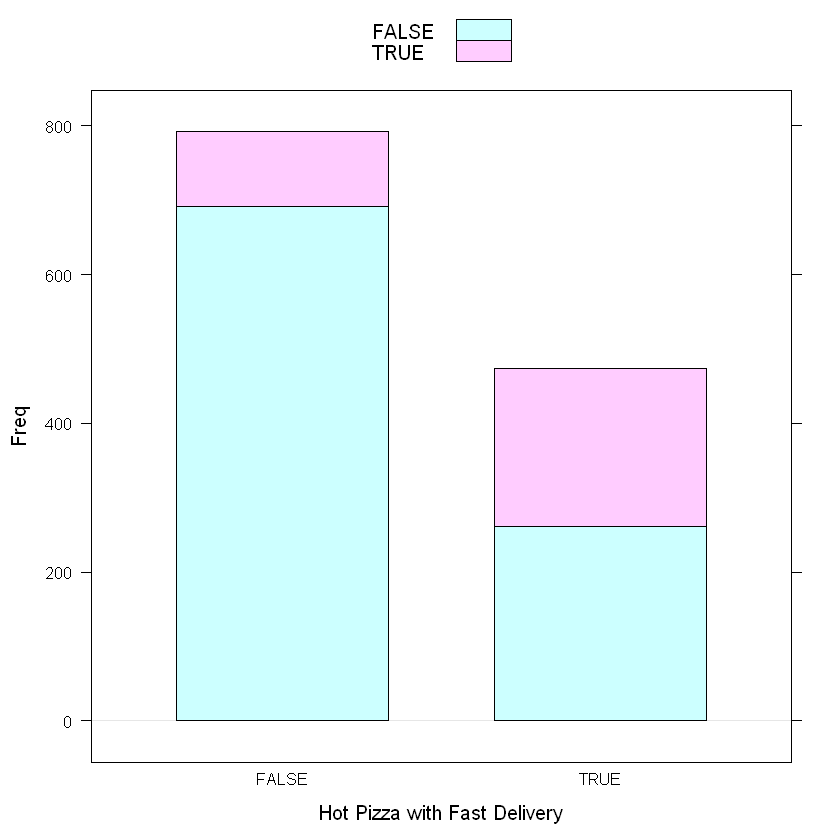

In [206]:
# using barcharts 
barchart(A, stack=T, horizontal=F, xlab='Hot Pizza with Fast Delivery', auto.key=T)

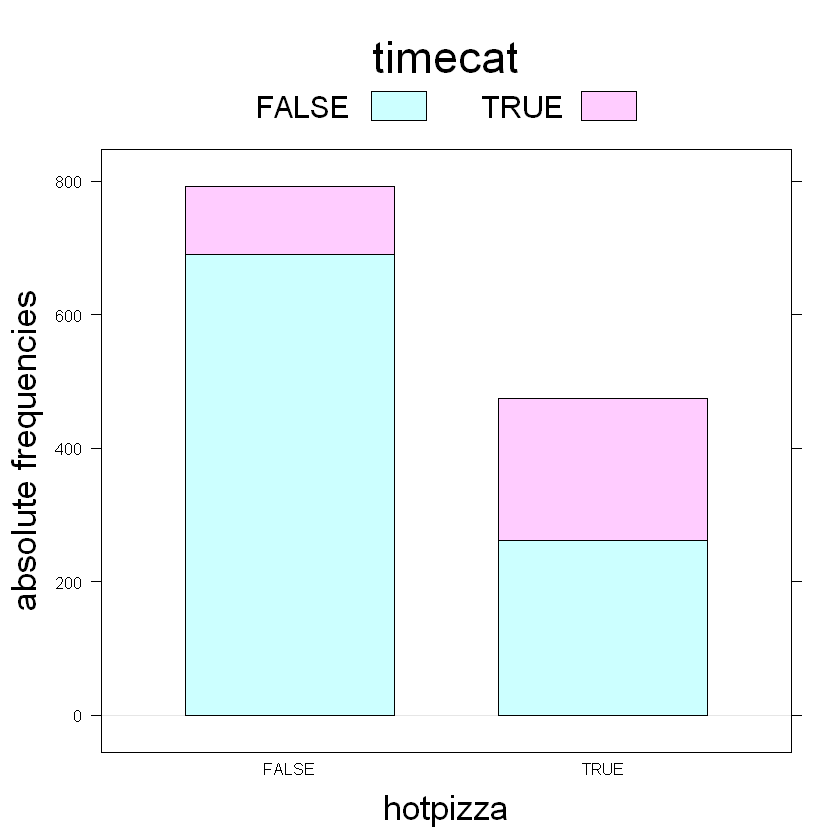

In [212]:
barchart(table(hotpizza=hot_pizza, fastdelivery=short_time),horizontal=F,stack=T,
         auto.key=list(space="top", columns=2,points=FALSE,cex=1.5,rectangles=TRUE,title="timecat"),
         ylab=list(label="absolute frequencies",  cex=1.75), 
         xlab=list(cex=1.75),
         par.names.text=list(cex=2))

### Scatter plot b/w the time and temperature

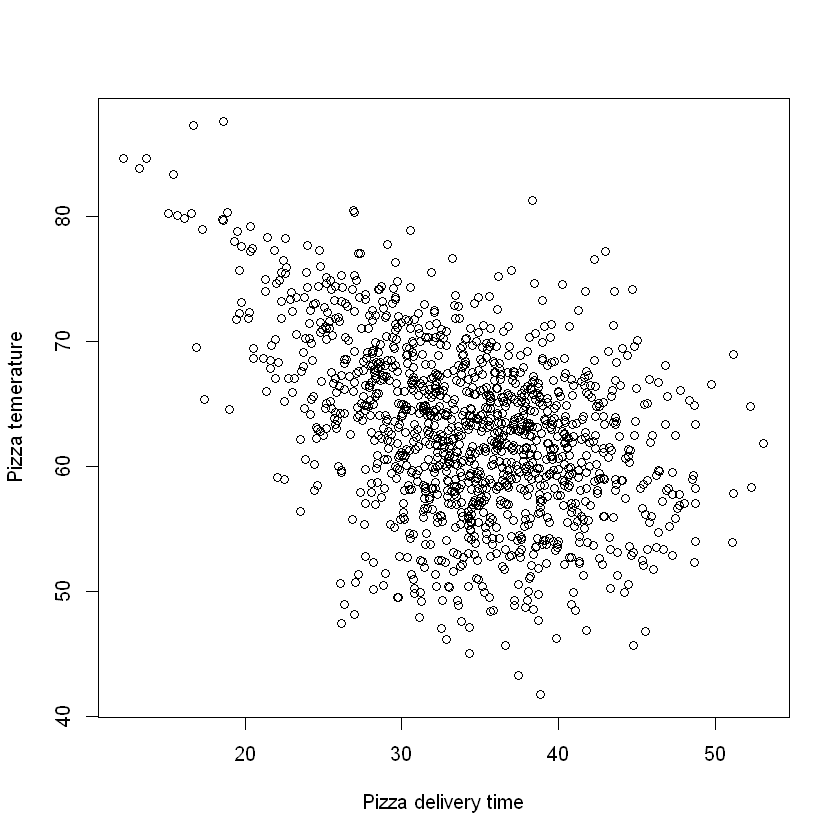

In [216]:
plot(y=Pizza$temperature, x = Pizza$time, ylab="Pizza temerature", xlab="Pizza delivery time")

From above result we can show say that there is a negative association b/w the pizza delivery time and pizza delivery temperature.

`Interpreatation:` Pizza delivery temperature will decrease as the delivery time increases.

### Pearson and Spearman Correlation coefficient

In [218]:
# Now we will check the association strongness and their direction by using the pearson and Spearman Correlation coefficient.

pearson_cor = cor(Pizza$time, Pizza$temperature, method='pearson')
spearman_cor = cor(Pizza$time, Pizza$temperature, method='spearman')

print(paste("Pearson Correlation Coefficient : ", round(pearson_cor, 2)))
print(paste("Spearman Correlation Coefficient : ", round(spearman_cor, 2) ))

[1] "Pearson Correlation Coefficient :  -0.43"
[1] "Spearman Correlation Coefficient :  -0.39"


`Conclusion:` Both the (pearson and spearman) correlation coefficient shows that there is a moderate negative association b/w the time and temperature variables.

___

### find the which variable influence the pizza temperature?

* Explore the realtionship b/w temperature and dirver, operator, number of orderd pizzas and bill. Is it clear which of the variables influence the pizza temperature.

To find the relation b/w the multiple number of variable we can use plot, corplot (correlation matrix plot) which will help us to visualise the relation and strongness of the association b/w those variable.

In [219]:
head(Pizza)

day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
Thursday,01-May-14,35.12837,Laura,East,Bruno,68.28772,58.4,4,0,0,1
Thursday,01-May-14,25.20307,Melissa,East,Salvatore,70.99779,26.4,2,0,0,0
Thursday,01-May-14,45.64340,Melissa,West,Salvatore,53.39415,58.1,3,1,0,0
Thursday,01-May-14,29.37430,Melissa,East,Salvatore,70.30660,35.2,3,0,0,0
Thursday,01-May-14,29.99461,Melissa,West,Salvatore,71.50169,38.4,2,0,0,0
Thursday,01-May-14,40.25432,Melissa,Centre,Bruno,60.75950,61.8,4,1,1,0


In [238]:
Pizza2 = data.frame(Pizza$temperature, Pizza$pizzas, Pizza$bill)
head(Pizza2)

Pizza.temperature,Pizza.pizzas,Pizza.bill
68.28772,4,58.4
70.99779,2,26.4
53.39415,3,58.1
70.30660,3,35.2
71.50169,2,38.4
60.75950,4,61.8


**Relation b/w the temperature, number of pizzas and bill**

Since temperature, number of pizzas and bill are the continuous and numeric type of variable, that's why we can use the plot() function on it and also we can perform the correlation test on those variables.

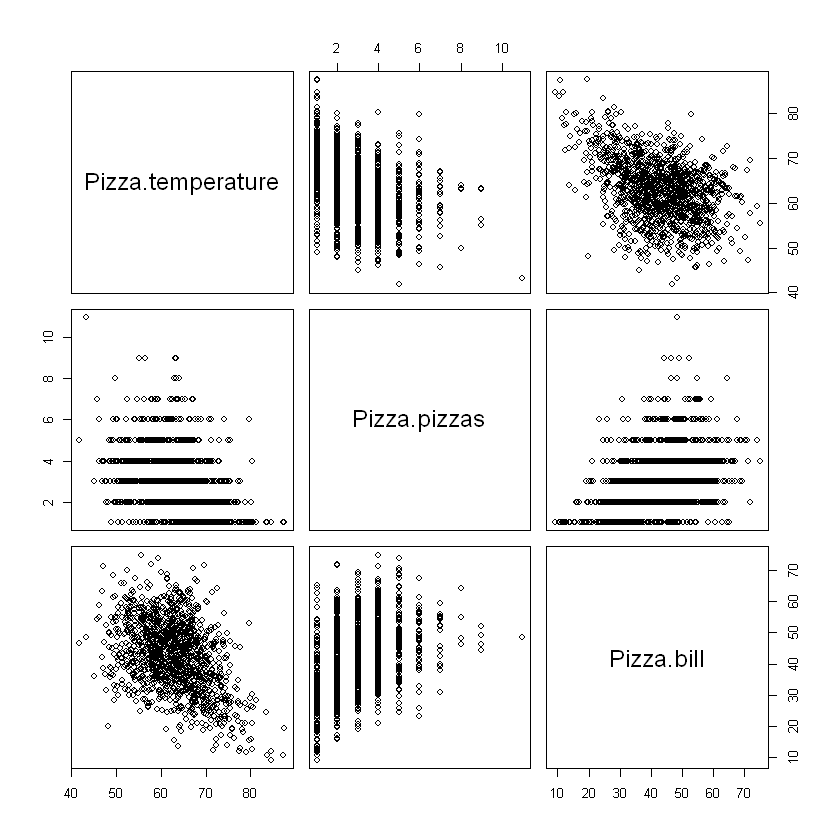

In [239]:
# We can visualise the direction of the association b/w the variable by using the plot 
plot(Pizza2)

In [241]:
round(cor(Pizza2), 2)

,Pizza.temperature,Pizza.pizzas,Pizza.bill
Pizza.temperature,1.00,-0.37,-0.42
Pizza.pizzas,-0.37,1.00,0.39
Pizza.bill,-0.42,0.39,1.00


**Relation b/w the tempearture and driver, opeartor**

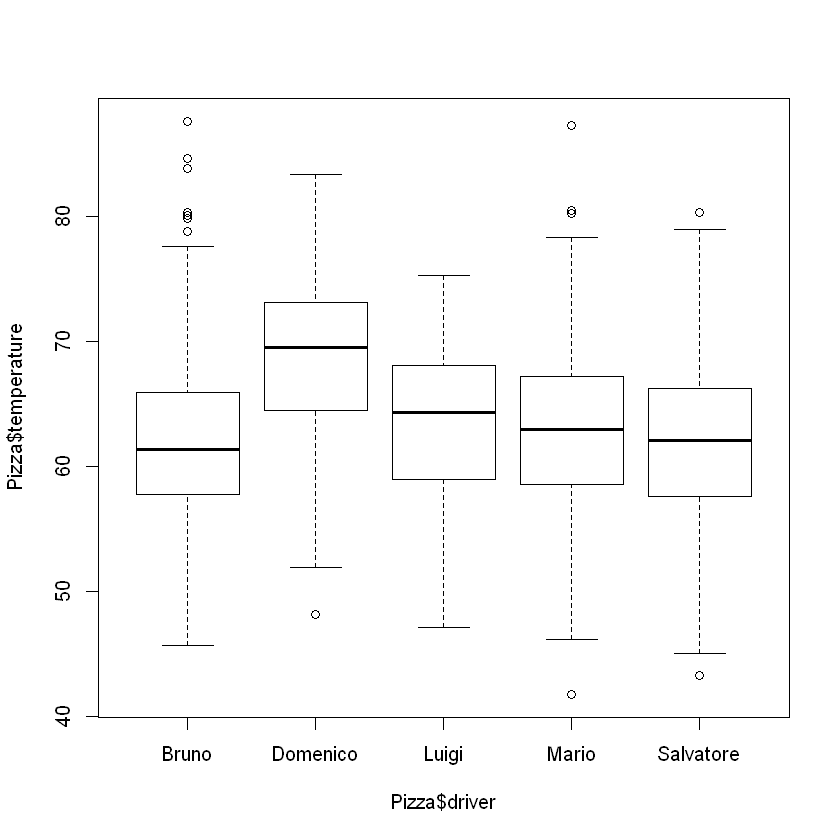

In [243]:
boxplot(Pizza$temperature~Pizza$driver)

`Conclusion:` Above result shows that there might be a relation b/w the pizza temperature and the driver, because there are two driver (Domenico, Mario) whose delivery temperature is higher than others but they might work behind different opeartor.

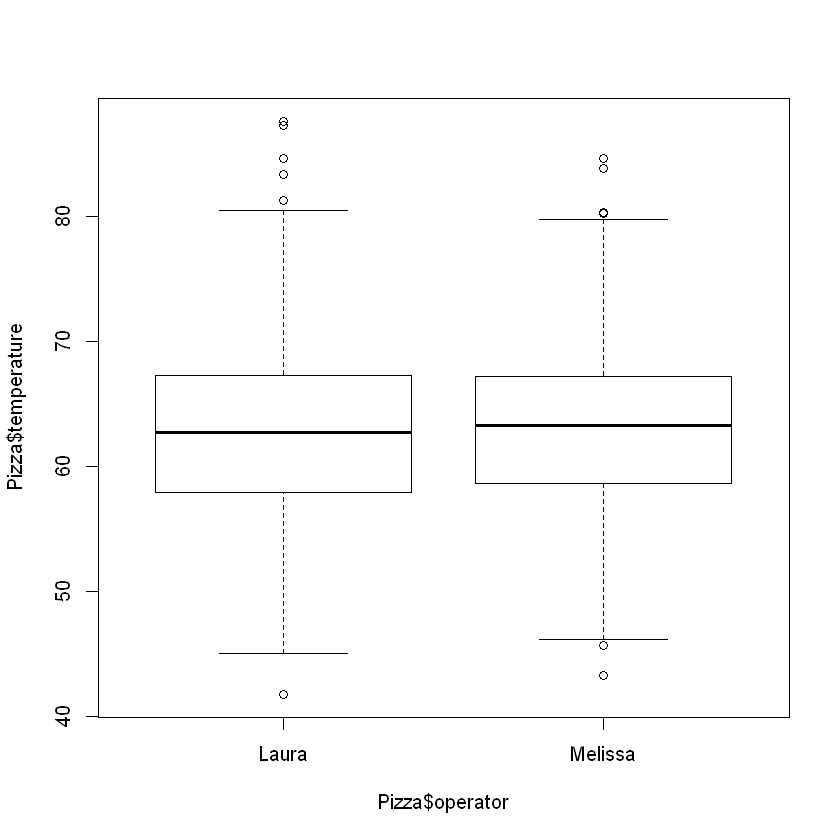

In [244]:
boxplot(Pizza$temperature~Pizza$operator)

`Conclusion:` Above result shows that there is not much effect of the operator on the delivery tempearture because both the operator gives us a same delivery temperature.

`Final Conclusion:` The correlation coefficients are −0.37 and −0.42 for number of pizzas and
bill, respectively. More pizzas and a higher bill are associated with a lower
temperature. 

* The box plots show variation in the delivery times
of the different drivers, but almost identical delivery times for the two operators.

* These results give us a first idea about the relationship in the data. However,
they do not tell us the full story. 
* For example: is the pizza temperature for higher
bills low because a higher bill means more pizzas, and therefore, a less efficient
preparation of the food? 
* Is one driver faster because he mainly delivers for a
particular branch? 
* Could it be that the operators have a different performance
but because they deal with different branches and drivers, these differences are
not visible? 

Note: To address these questions, a multivariate perspective is needed.
Regression models Which will be discussed in later chapters.